In [79]:
import psutil
import time
import os
import threading
from matplotlib import pyplot as plt

from collections import namedtuple

In [85]:
psutil.virtual_memory()

svmem(total=34155745280, available=22990143488, percent=32.7, used=11165601792, free=22990143488)

In [91]:
Utilization = namedtuple('Utilizations', ['CPU', 'RAM'])

class UtilizationThread(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
        self.cpu_usage = []
        self.ram_usage = []
    
    def run(self):
        self.keep_running = True
        while self.keep_running:
            self.cpu_usage += [psutil.cpu_percent(1)]
            self.ram_usage += [psutil.virtual_memory().percent]
    
    def join(self):
        self.keep_running = False
        super().join()
        return Utilization(
            self.cpu_usage,
            self.ram_usage,
        )
    
    def plotResults(self):
        plt.plot(self.cpu_usage, label='CPU Usage')
        plt.plot(self.ram_usage, label='RAM Usage')
        ax = plt.gca()
        ax.set_ylim([0, 100])
        plt.legend()

In [92]:
util_thread = UtilizationThread()

In [93]:
util_thread.start()

In [94]:
util_thread.join()

Utilizations(CPU=[9.9, 8.2, 4.7, 3.2, 2.5, 3.2, 2.4], RAM=[33.4, 33.4, 33.3, 33.4, 33.3, 33.3, 33.3])

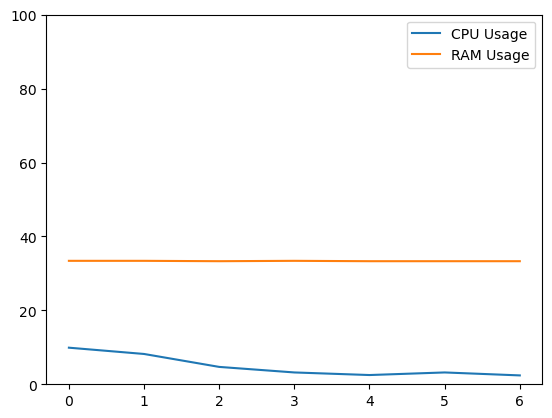

In [95]:
util_thread.plotResults()
plt.show()